<a href="https://colab.research.google.com/github/leshless/study/blob/main/calculus_python/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Занятие 4
## Математический анализ
## Анализ функции. Построение графика в matplotlib.pyplot
https://matplotlib.org
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
https://matplotlib.org/tutorials/text/annotations.html

In [20]:
# Импорт библиотеки matplotlib.pyplot обычно осуществляется так:
import matplotlib.pyplot as plt
from sympy import Symbol, symbols, S, solve, solveset, latex, fraction, Eq
from sympy.calculus.util import continuous_domain
# А для того, чтобы использовать все остальное, сделаем так:
import sympy
import numpy as np

### Задание 1
Найти точки пересечения графика функции $f(x) = (x^2 + 3 x - 2)\log_2(3x+1)$ с осями координат, построить график и отметить точки пересечения.

#### Указание.
Определить функцию как в Примере 3, поскольку нужно будет использовать функцию  $\log_2(x)$ из каждого пакета sympy и numpy.
В numpy использовать $log2(x)$ для вычисления логарифма по основанию 2.

Сроить график только в пределах области определения функции. Точки пересечения с осью OX должны быть не только решениями соответствующего уравнения, но и принадлежать области определения функции.

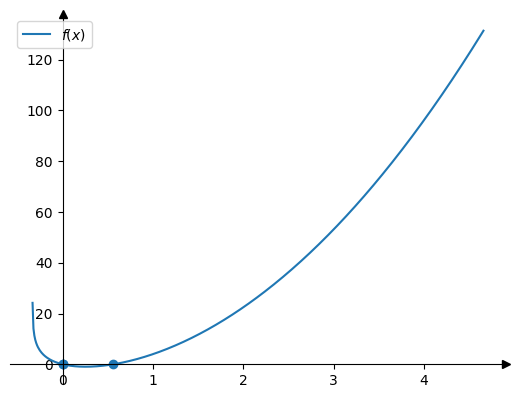

In [108]:
def f(x : np.array, lib="sympy"):
  if lib == "sympy":
    return (x**2 + 3*x - 2) * sympy.log(3*x + 1, 2)
  elif lib == "numpy":
    return (x**2 + 3*x - 2) * np.log2(3*x + 1)
  else:
    raise exeption('Wrong library name, only sympy or numpy is allowed')

x = symbols("x", domain=S.Reals)
D = continuous_domain(f(x), x, S.Reals)

X = np.linspace(float(D.inf) + 0.001, float(D.inf) + 5, 500, endpoint=False)
Y = f(X, lib="numpy")

x0 = list(solveset(f(x), domain=D))
x0.append(0)
y0 = [f(x) for x in x0]

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

ax.plot(X, Y, label="$f(x)$")
ax.scatter(x0, y0)
ax.legend(loc="best")

### Задание 2
Найти асимптоты графика функции $g(x) = \frac{35x^2 + 4x - 15}{3x - 2}$, построить график и асимптоты, в легенду графика включить формулы функции и асимптот, подписать оси 'x' и 'y'.

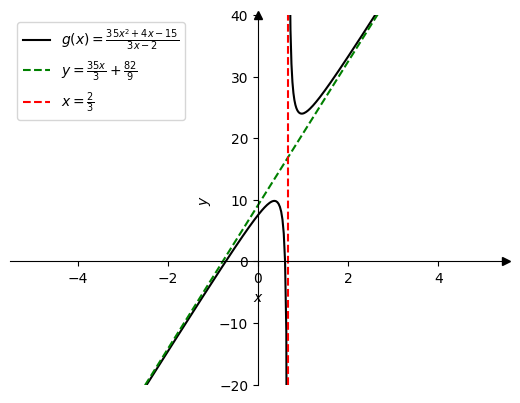

In [110]:
def g(x):
  return (35 * x**2 + 4 * x - 15) / (3 * x - 2)

x = symbols("x", domain=S.Reals)
D = continuous_domain(g(x), x, S.Reals)

_, den = sympy.fraction(g(x))
v_as = sympy.solve(den, x)[0]

k = sympy.limit(g(x)/x, x, +sympy.oo)
b = sympy.limit(g(x) - k*x, x, +sympy.oo)
n_as = (lambda x : k*x + b)

X1 = np.linspace(-5, float(v_as) - 0.01, 200)
Y1 = g(X1)

X2 = np.linspace(float(v_as) + 0.01, 5, 200)
Y2 = g(X2)

NX = np.linspace(-5, 5, 200)
NY = n_as(NX)

ax = plt.gca()
ax.set(ylim=(-20, 40))
ax.set(xlabel="$x$", ylabel="$y$")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

ax.plot(X1, Y1, "k-", label=f"$g(x)={sympy.latex(g(x))}$")
ax.plot(X2, Y2, "k-")
ax.plot(NX, NY, "g--", label=f"$y={sympy.latex(n_as(x))}$")
ax.axvline(x=float(v_as), color='r', linestyle='--', label=f"$x={sympy.latex(v_as)}$")
ax.legend(loc="best")

### Задание 3.
Описать в виде функции траекторию пули, выпущенной со скоростью $v_0$ под углом $\alpha$ к горизонту (по умолчанию $v_0 = 0$, $\alpha = \pi/2$)
$$
\left\{
\begin{matrix}
x=v_0t\cos\alpha\\
y=v_0t\sin\alpha-\frac{10t^2}{2}
\end{matrix}
\right.
$$
Аргументы функции $t$, $v_0$ и $\alpha$, результат - два выражения $x$ и $y$, в соответствии с формулами, приведенными выше.

Определить соответствующий набору параметров $v_0$ и $\alpha$ диапазон значений параметра времени $t$, учитывая, что пуля не должна провалиться сквозь землю.

Построить траектории при заданных значениях начальной скорости и угла на одном графике (($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2$, $\alpha = 1$)). Графики должны быть соответственно зеленого, красного и черного цвета.

Подписать оси $x$, $y$.

В легенде отразить значения параметров, например, $v_0 = 2,\ \alpha = \pi/6$.

Название графика - Траектории пуль.
#### Указание.
Использовать $\sin$ из numpy.

Решить уравнение $y = 0$ относительно $t$, пользуясь solve или solveset, чтобы с помощью найденного значения $t$ определить правую границу значений $x$.

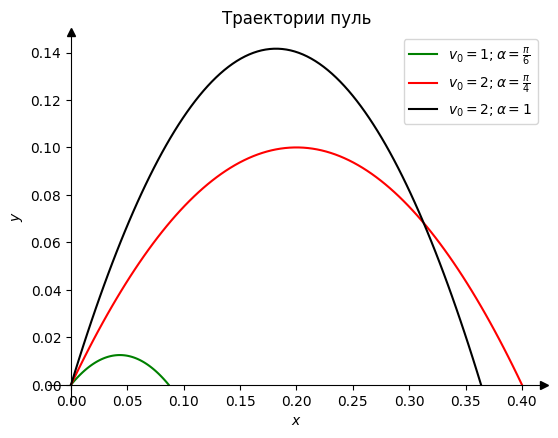

In [131]:
def y(t, v0=0, alpha=S.Pi/2):
  return v0*t*sympy.sin(alpha) - 5*t**2

def f(t, v0=0, alpha=np.pi/2):
  x = v0*t*np.cos(alpha)
  y = v0*t*np.sin(alpha) - 5*t**2

  return x, y


ax = plt.gca()
ax.set(title="Траектории пуль")
ax.set(xlabel="$x$", ylabel="$y$")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

t = symbols("t")

args = [(1, S.Pi/6), (2, S.Pi/4), (2, 1)]
colors = ["g", "r", "k"]


for i in range(len(args)):
  v0, alpha = args[i]
  col = colors[i]

  t_max = float(max(sympy.solve(y(t, v0=v0, alpha=alpha), t)))
  T = np.linspace(0, t_max, 100)
  X, Y = f(T, v0=float(v0), alpha=float(alpha))
  ax.plot(X, Y, f"{col}-", label=f"$v_0={sympy.latex(v0)}; \\alpha={sympy.latex(alpha)}$")

ax.legend(loc="best")

### Индивидуальное задание.
Построить в одной координатной плоскости графики функций.

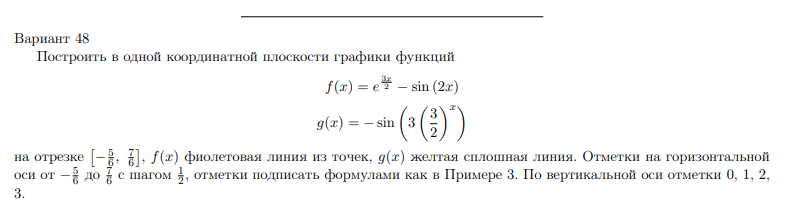

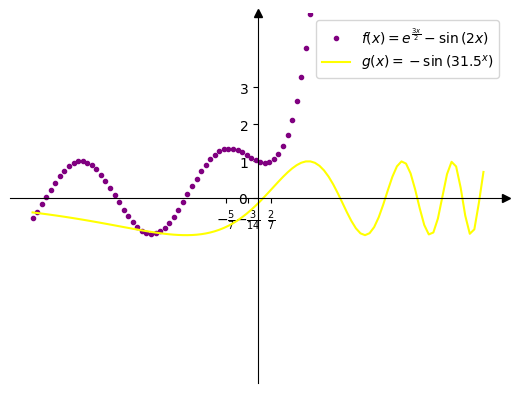

In [160]:
def f(x):
  return np.exp(3*x/2) - np.sin(2*x)

def f_sympy(x):
  return sympy.exp(3*x/2) - sympy.sin(2*x)

def g(x):
  return -np.sin(3*(3/2)**x)

def g_sympy(x):
  return -sympy.sin(3*(3/2)**x)

ax = plt.gca()

ax.set(ylim=(-5, 5))
ax.set_xticks([-5/7 + 1/2*i for i in range(3)])
ax.set_xticklabels([f"${sympy.latex(sympy.Rational(-5, 7) + sympy.Rational(1, 2)*i)}$" for i in range(3)])
ax.set_yticks([i for i in range(4)])
ax.set_yticklabels([f"${i}$" for i in range(4)])

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

x = symbols("x")

X = np.linspace(-5, 5, 100)
ax.plot(X, f(X), ".", color="purple", label=f"$f(x)={sympy.latex(f_sympy(x))}$")
ax.plot(X, g(X), "-", color="yellow", label=f"$g(x)={sympy.latex(g_sympy(x))}$")

ax.legend(loc="best")